# Trends activity

17


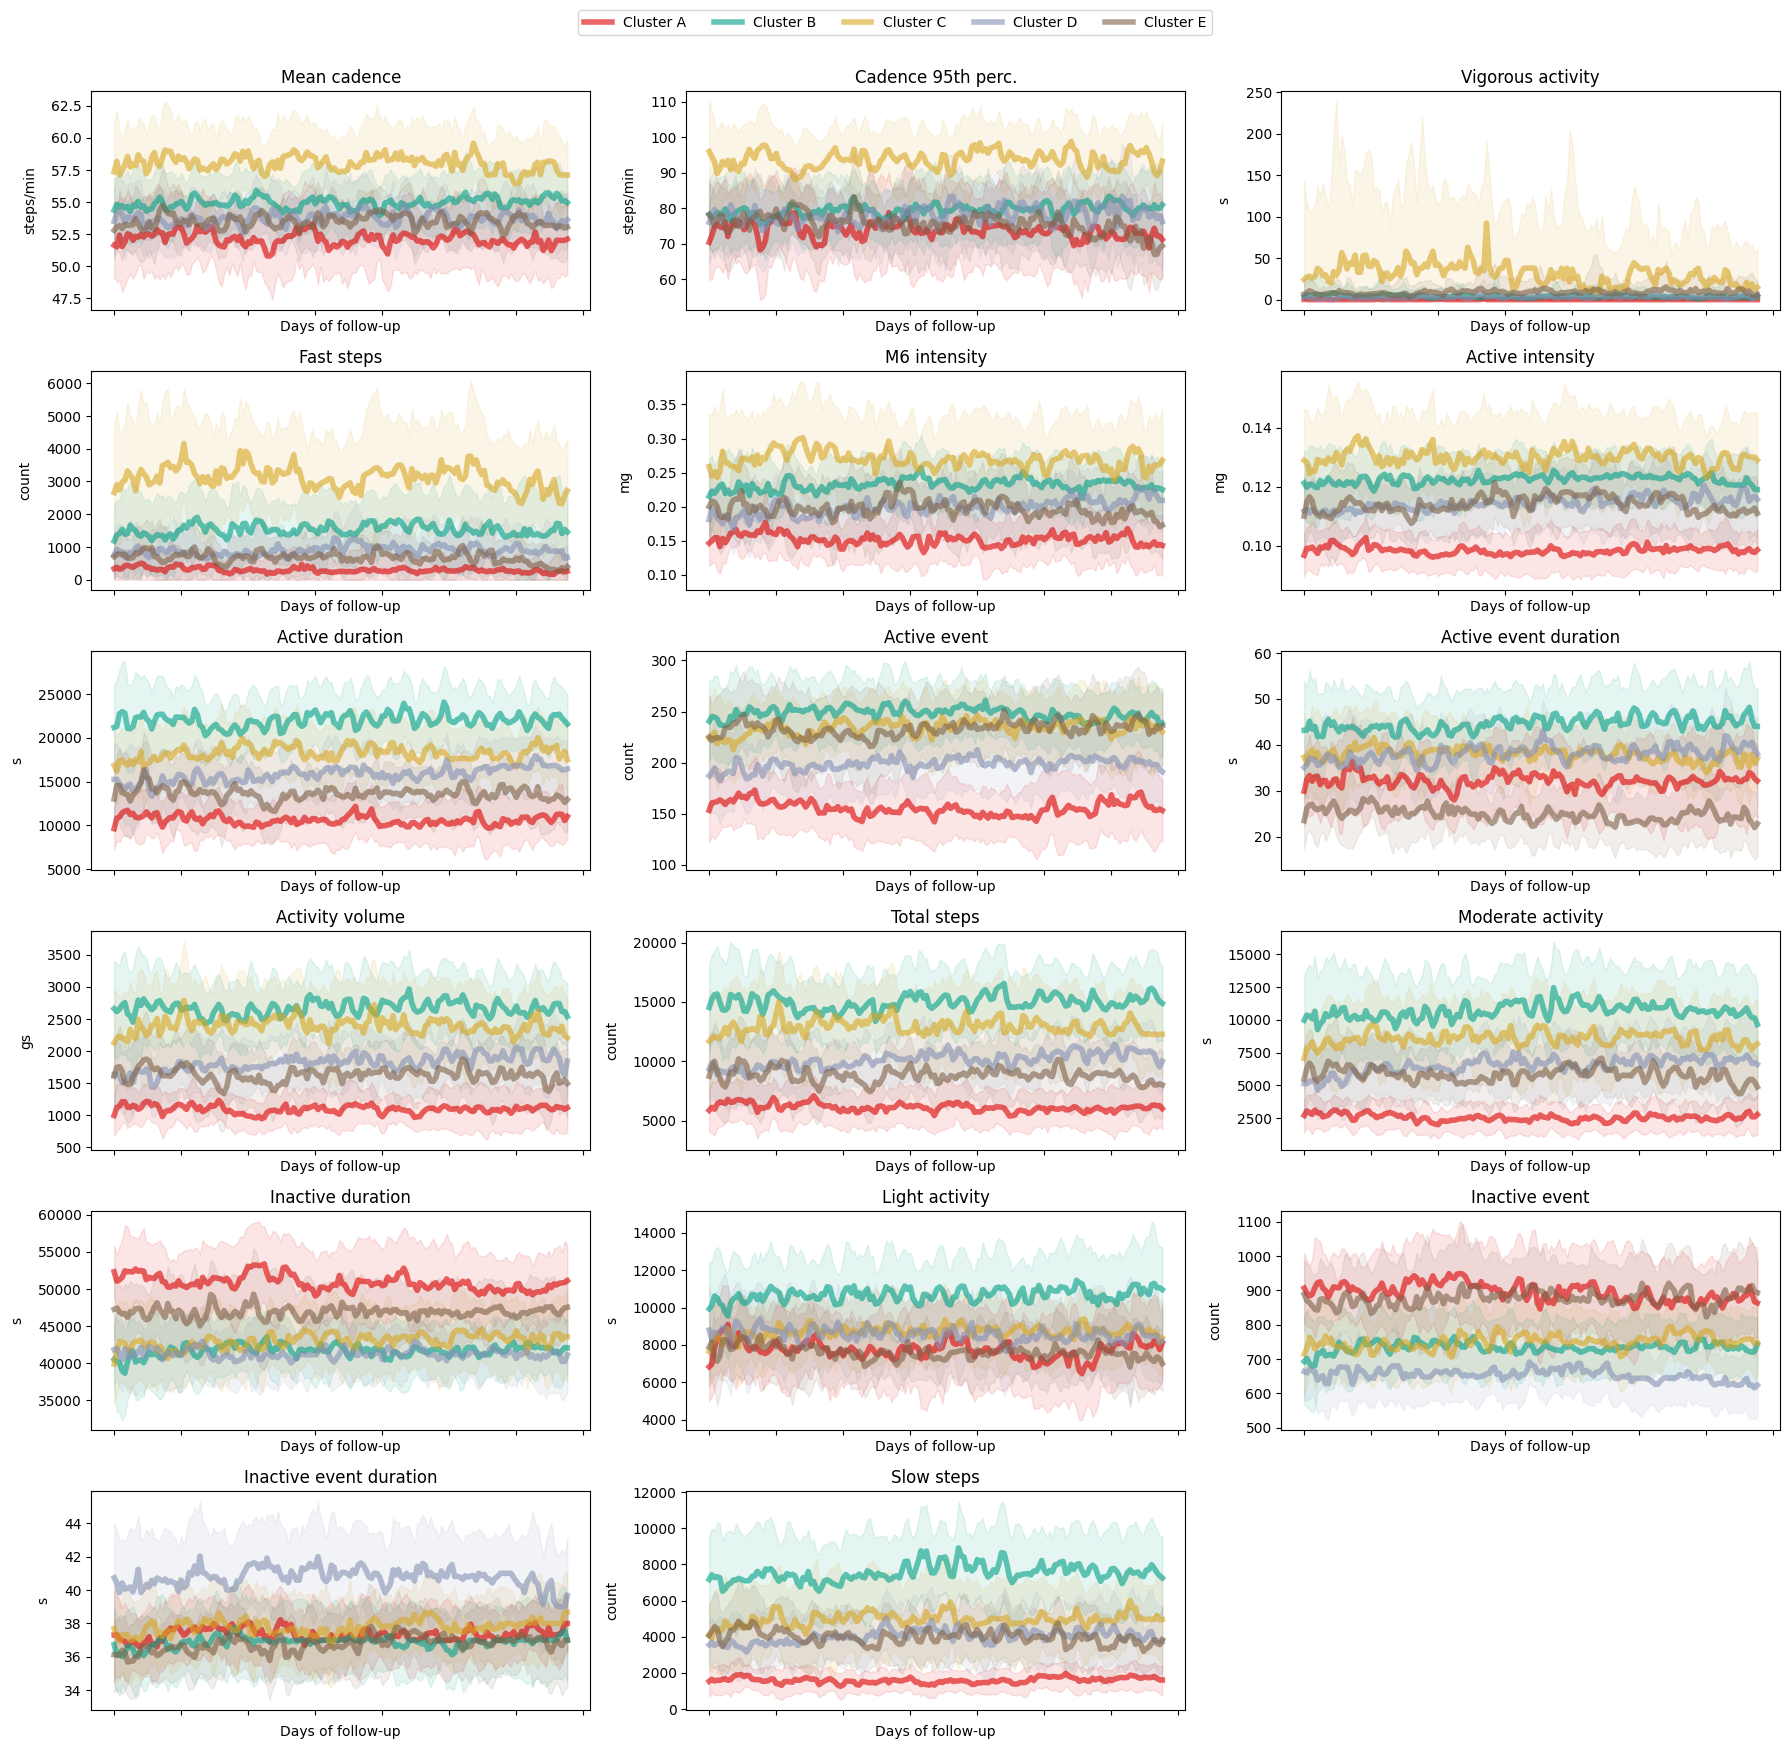

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.stats import iqr
import numpy as np
import matplotlib.pyplot as plt

def smooth_signal(signal, window_size):
    window = np.ones(window_size) / window_size
    return convolve(signal, window, mode='valid')

cluster_array = np.load('cluster_array.npy')
cluster_mapping = {0: 1, 1: 3, 2: 2, 3: 4, 4: 0}  # Your mapping
cluster_array = np.array([cluster_mapping[value] for value in cluster_array])

unique_clusters = np.unique(cluster_array)
rolled_data= np.load('unscaled.npy')

cluster_data = {cluster: [] for cluster in unique_clusters}

for i in range(len(cluster_array)):
    cluster = cluster_array[i]
    cluster_data[cluster].append(rolled_data[i])

for cluster in unique_clusters:
    cluster_data[cluster] = np.array(cluster_data[cluster])


act = ['Inactive duration', 'Active duration', 'Light activity', 'Moderate activity',
       'Vigorous activity', 'Inactive event', 'Active event', 'Inactive event duration',
       'Active event duration', 'M6 intensity', 'Active intensity', 'Activity volume',
       'SleepOnsetLatency', 'SleepIntervalDuration',
       'TotalSleepDuration', 'SleepEfficiency', 'WASOCount', 'WASOMedian',
       'TimeFirstWASO', 'LongestSleepPeriod', 'NapsDurationperDay', 'SleepEventsNumber',
       'Total steps', 'Mean cadence', 'Cadence 95th perc.', 'Slow steps',
       'Fast steps']


high_activity_columns = ['Mean cadence', 'Cadence 95th perc.', 'Vigorous activity', 
                         'Fast steps', 'M6 intensity', 'Active intensity']
middle_activity_columns = ['Active duration', 'Active event', 'Active event duration', 'Activity volume', 'Total steps',
                           'Moderate activity']
low_activity_columns = ['Inactive duration', 'Light activity', 'Inactive event',
                        'Inactive event duration', 'Slow steps']

act_idx = high_activity_columns + middle_activity_columns + low_activity_columns

lab = ['s', 's', 's', 's', 's', 'count', 'count', 's', 's', 'mg', 'mg', 'gs', 's', 's',
       's', '%', 'count', 's', 's', 's', 's', 'count', 'count', 'steps/min', 'steps/min', 'count', 'count']

print(len(act_idx))
unique_clusters.sort()

num_metrics = len(act_idx)
rows = int(np.ceil(num_metrics / 3))  # Assuming 6 columns per row
cols = min(num_metrics, 3)

colors = [
    '#DC000099',  # Red
    '#00A087FF',  # Green
    (0.85, 0.65, 0.13),  # Yellow
    '#8491B4FF',  # Blue
    '#7E6148FF',  # Brown
]

fig, axes = plt.subplots(rows, cols, figsize=(18, 17), sharex=True)

lines = [] 
cluster_lab = ["A", "B", "C", "D", "E"]

for metric_idx, metric in enumerate(act_idx):
    row = metric_idx // cols
    col = metric_idx % cols

    for cluster in unique_clusters:
        cluster_gr = cluster_data[cluster]
        cluster_gr_metrics = cluster_gr[:, :, act.index(metric)] 
        cluster_median = np.median(cluster_gr_metrics, axis=0)
        cluster_iqr = iqr(cluster_gr_metrics, rng=(25, 75), axis=0)
        cluster_median = cluster_median[10:]
        cluster_iqr = cluster_iqr[10:]
        line, = axes[row, col].plot(cluster_median, label=f'Cluster {cluster_lab[cluster]}', color=colors[cluster], linewidth=4, alpha=0.6)
        lower_bound = np.maximum(0, cluster_median - 0.5 * cluster_iqr)
        upper_bound = cluster_median + 0.5 * cluster_iqr

        axes[row, col].fill_between(
            range(len(cluster_median)),
            lower_bound,
            upper_bound,
            alpha=0.1,
            color=colors[cluster]
        )
        axes[row, col].set_title(metric)
        axes[row, col].set_xlabel('Days of follow-up')
        y_lab = act.index(metric)
        axes[row, col].set_ylabel(lab[y_lab], labelpad=10) # Corrected this line
        #axes[row, col].grid(axis='both', alpha=0.7)
        lines.append(line)
        axes[row, col].set_xticklabels([])

for metric_idx in range(num_metrics, rows * cols):
    fig.delaxes(axes.flatten()[metric_idx])
legend_labels = [f'Cluster {lab}' for lab in cluster_lab]
fig.legend(lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), fontsize=10, ncol=5)
fig.subplots_adjust(top=0.8)  
plt.tight_layout()
plt.show()

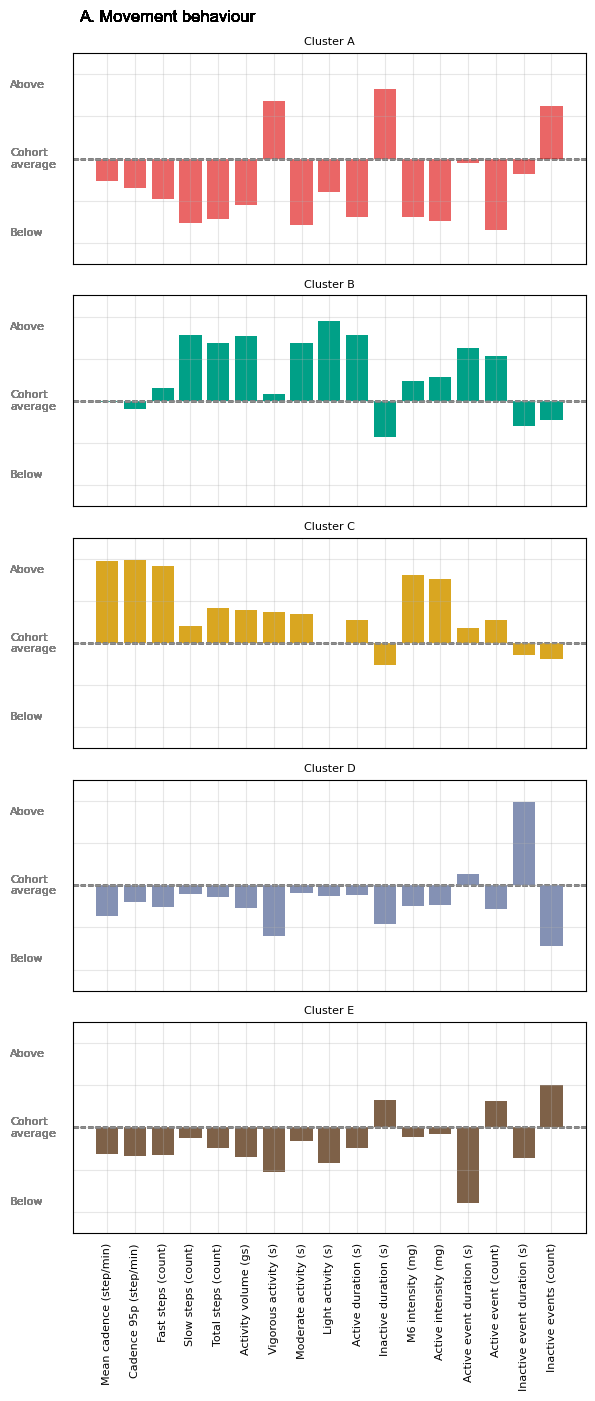

In [586]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

means_by_cluster = df_clusters_metrics.groupby('cluster').mean()
activity_columns = ['Mean cadence (step/min)', 'Cadence 95p (step/min)','Fast steps (count)','Slow steps (count)', 'Total steps (count)', 
                    'Activity volume (gs)', 'Vigorous activity (s)',  'Moderate activity (s)', 'Light activity (s)',
                    'Active duration (s)',  'Inactive duration (s)', 'M6 intensity (mg)',  'Active intensity (mg)',       
                    'Active event duration (s)', 'Active event (count)','Inactive event duration (s)', 'Inactive events (count)']

scaler = StandardScaler()
means_by_cluster_sc = scaler.fit_transform(means_by_cluster[activity_columns])
means_by_cluster_sc = pd.DataFrame(means_by_cluster_sc, columns=activity_columns)

cluster_mapping = {0: 'B', 1: 'D', 2: 'C', 3: 'E', 4: 'A'}  # Add more if needed
means_by_cluster_sc['cluster'] = means_by_cluster_sc.index.map(cluster_mapping)
means_by_cluster_sc.index = means_by_cluster_sc.index.map(cluster_mapping)

num_clusters = len(means_by_cluster_sc.index)
num_subplots = num_clusters

cluster_order = ['A', 'B', 'C', 'D', 'E']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 14))
plt.subplots_adjust(hspace=0.75)
axes = axes.flatten()
colors = plt.cm.viridis(np.linspace(0.1, 0.95, 5))
colors = [
        '#DC000099',  # Red
        '#00A087FF',  # Green
        (0.85, 0.65, 0.13),  # Yellow
        '#8491B4FF',  # Blue
        '#7E6148FF',  # Brown
    ]

fontsize = 8
for cluster_label in cluster_order:
    i = cluster_order.index(cluster_label)
    ax = axes[i]
    sel_cluster = means_by_cluster_sc[means_by_cluster_sc['cluster'] == cluster_label]
    ax.grid(alpha=0.3, axis='both', which='major', zorder=0)
    
    for j, activity_metric in enumerate(activity_columns):
        bar = ax.bar(activity_metric, sel_cluster[activity_metric].values[0], color=colors[i],
                     label=activity_metric, width=0.8)
        if i == 0:
            ax.text(-1.0, 3.25, 'A. Movement behaviour', fontname= 'Arial', fontsize=12)
        if i == 4:
            ax.set_xticks(range(len(activity_columns)))
            ax.set_xticklabels(activity_columns, rotation=90, fontsize=8)
        else:
            ax.set_xticklabels([])
        ax.set_title(f'Cluster {cluster_label}', fontsize=8)
        ax.set_yticklabels([])
        ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label='Population average', zorder=1)
        ax.text(-3.5, -1.75, 'Below', color='grey', ha='left', va='center', fontsize=fontsize)
        ax.text(-3.5, 0, 'Cohort\naverage', color='grey', ha='left', va='center', fontsize=fontsize)
        ax.text(-3.5, 1.75, 'Above', color='grey', ha='left', va='center', fontsize=fontsize)
        ax.set_ylim(-2.5, 2.5)
        ax.set_yticklabels([])
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
        ax.tick_params(axis='y', which='both', left=False, right=False)
for i in range(len(cluster_order), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

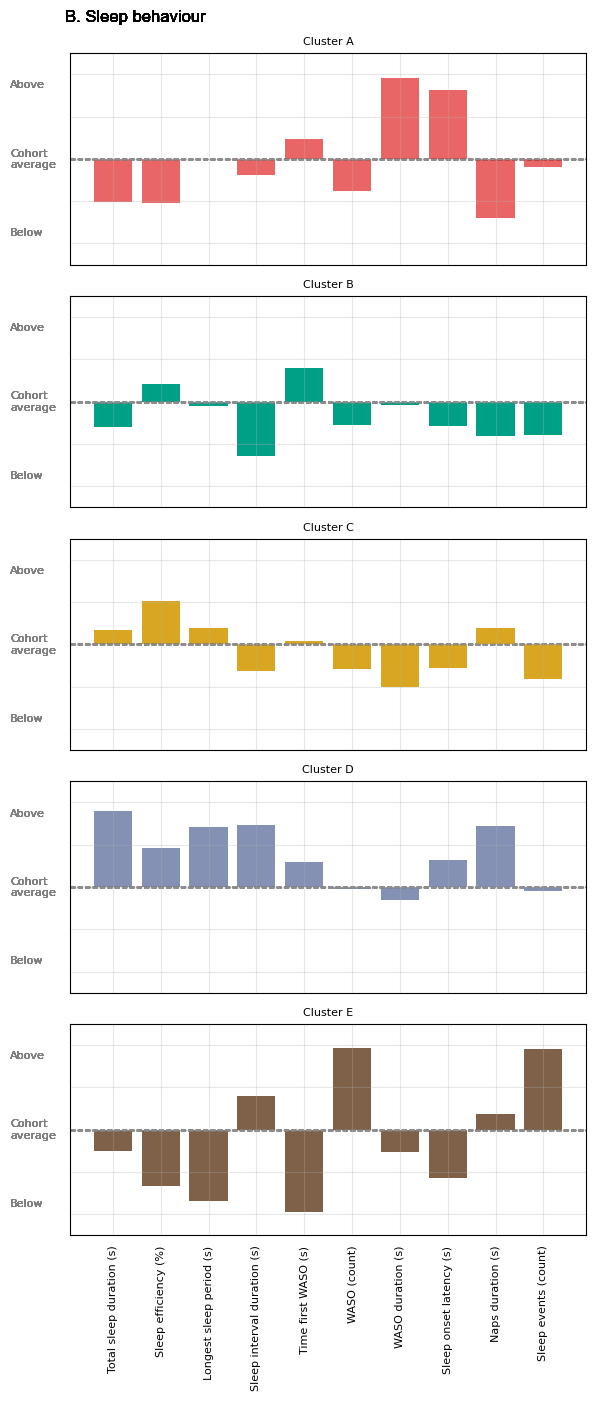

In [587]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

means_by_cluster = df_clusters_metrics.groupby('cluster').mean()

activity_columns = ['Total sleep duration (s)', 'Sleep efficiency (%)', 'Longest sleep period (s)',
                 'Sleep interval duration (s)', 'Time first WASO (s)', 'WASO (count)', 'WASO duration (s)',
                 'Sleep onset latency (s)', 'Naps duration (s)', 'Sleep events (count)']

scaler = StandardScaler()
means_by_cluster_sc = scaler.fit_transform(means_by_cluster[activity_columns])
means_by_cluster_sc = pd.DataFrame(means_by_cluster_sc, columns=activity_columns)
cluster_mapping = {0: 'B', 1: 'D', 2: 'C', 3: 'E', 4: 'A'}  # Add more if needed
means_by_cluster_sc['cluster'] = means_by_cluster_sc.index.map(cluster_mapping)
means_by_cluster_sc.index = means_by_cluster_sc.index.map(cluster_mapping)
num_clusters = len(means_by_cluster_sc.index)
num_subplots = num_clusters
cluster_order = ['A', 'B', 'C', 'D', 'E']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 14))
plt.subplots_adjust(hspace=0.75)
axes = axes.flatten()

fontsize = 8

for cluster_label in cluster_order:
    i = cluster_order.index(cluster_label)
    ax = axes[i]
    sel_cluster = means_by_cluster_sc[means_by_cluster_sc['cluster'] == cluster_label]
    ax.grid(alpha=0.3, axis='both', which='major', zorder=0)

    for j, activity_metric in enumerate(activity_columns):
        bar = ax.bar(activity_metric, sel_cluster[activity_metric].values[0], color=colors[i], 
                     label=activity_metric, width=0.8)
        if i == 0:
            ax.text(-1.0, 3.25, 'B. Sleep behaviour', fontname='Arial', fontweight='normal', fontsize=12)
        if i == 4:
            ax.set_xticks(range(len(activity_columns)))
            ax.set_xticklabels(activity_columns, rotation=90, fontsize=8)
        else:
            ax.set_xticklabels([])
        ax.set_title(f'Cluster {cluster_label}', fontsize=8)
        ax.set_yticklabels([])
        ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label='Population average', zorder=1)
        ax.text(-2.15, -1.75, 'Below', color='grey', ha='left', va='center', fontsize=fontsize)
        ax.text(-2.15, 0, 'Cohort\naverage', color='grey', ha='left', va='center', fontsize=fontsize)
        ax.text(-2.15, 1.75, 'Above', color='grey', ha='left', va='center', fontsize=fontsize)
        ax.set_ylim(-2.5, 2.5)
        ax.set_yticklabels([])
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
        ax.tick_params(axis='y', which='both', left=False, right=False)
for i in range(len(cluster_order), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

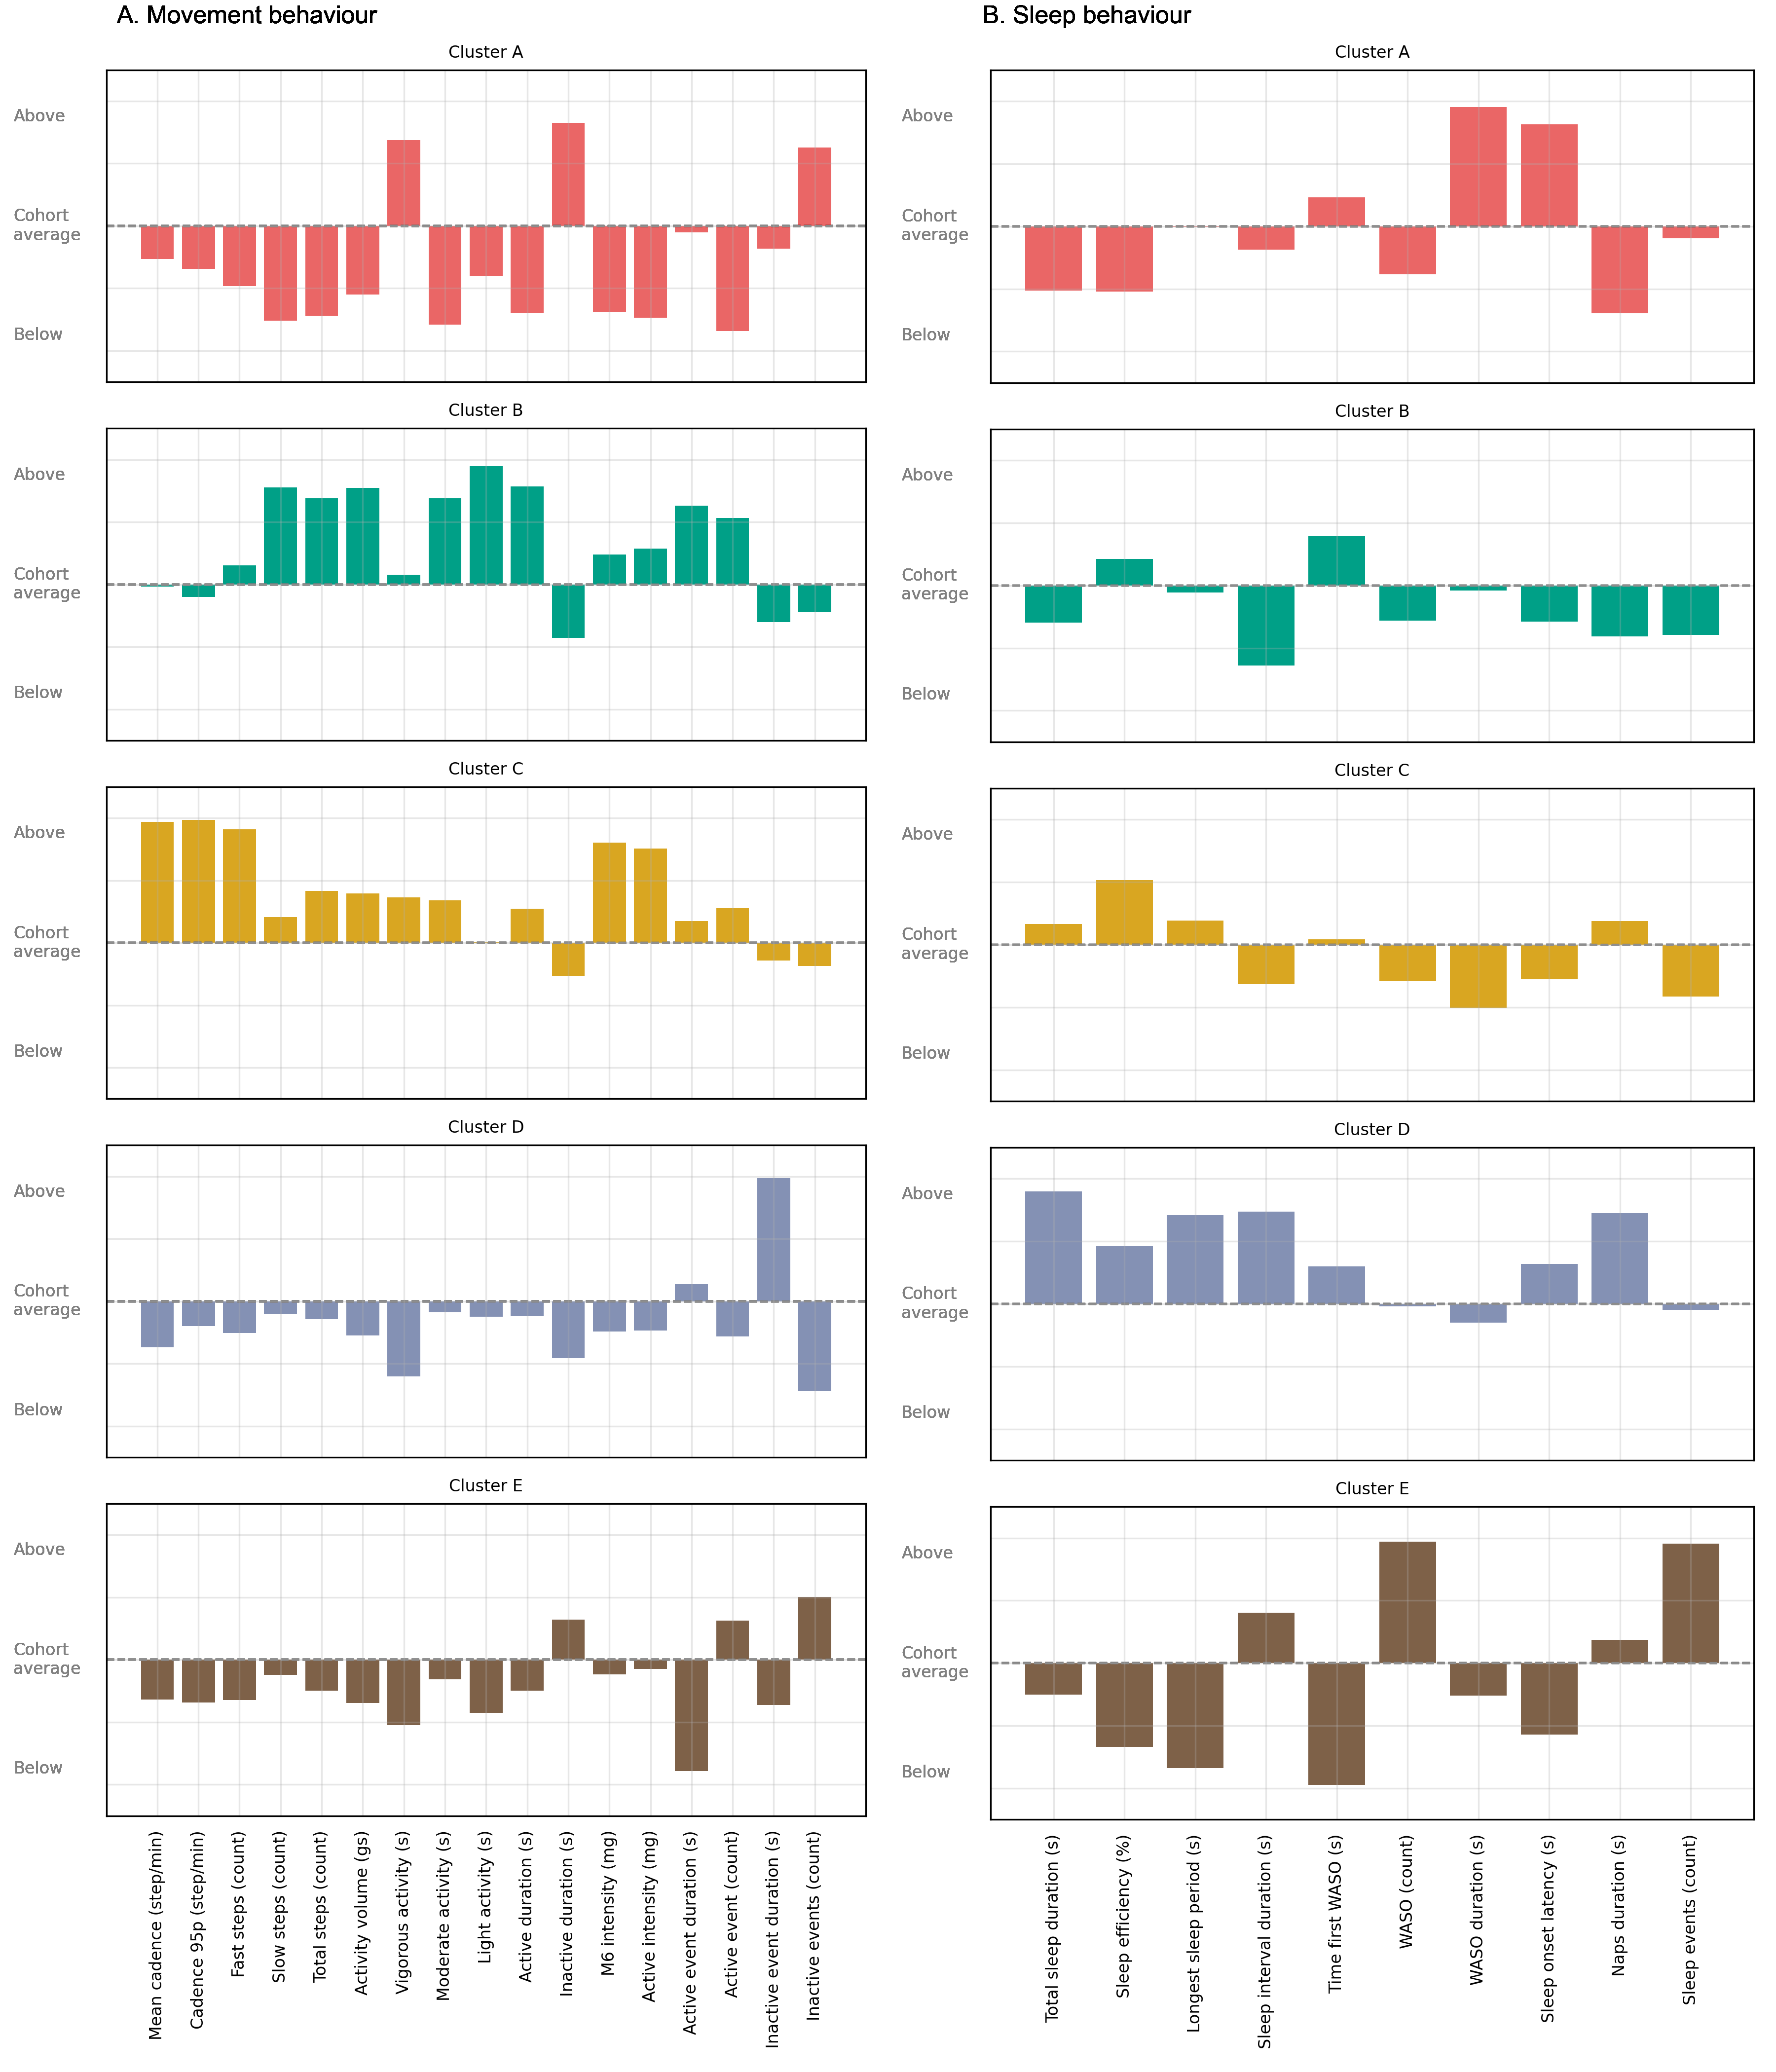

In [589]:
path = r'\\BAR\\'

file1 = 'Activity.tiff'
file2 = 'Sleep.tiff'

image1 = path + file1
image2 = path + file2
list_im = [image1, image2]

imgs = [Image.open(i) for i in list_im]

min_shape = [(np.sum(i.size), i.size) for i in imgs][0][1]
imgs_comb = np.hstack([np.array(i.resize(min_shape)).astype(np.uint8) for i in imgs])
imgs_comb_hor = Image.fromarray(imgs_comb).convert("RGB")

imgs_comb = np.hstack([np.array(i.resize(min_shape)).astype(np.uint8) for i in imgs])
imgs_comb_bipolar = Image.fromarray(imgs_comb).convert("RGB")
output = path + 'Fig 2.' + '.pdf'
imgs_comb_bipolar.save(output)
imgs_comb_bipolar

# Heatmap

C:\Users\mzkolk\AppData\Local\Temp\ipykernel_6804\3037570097.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


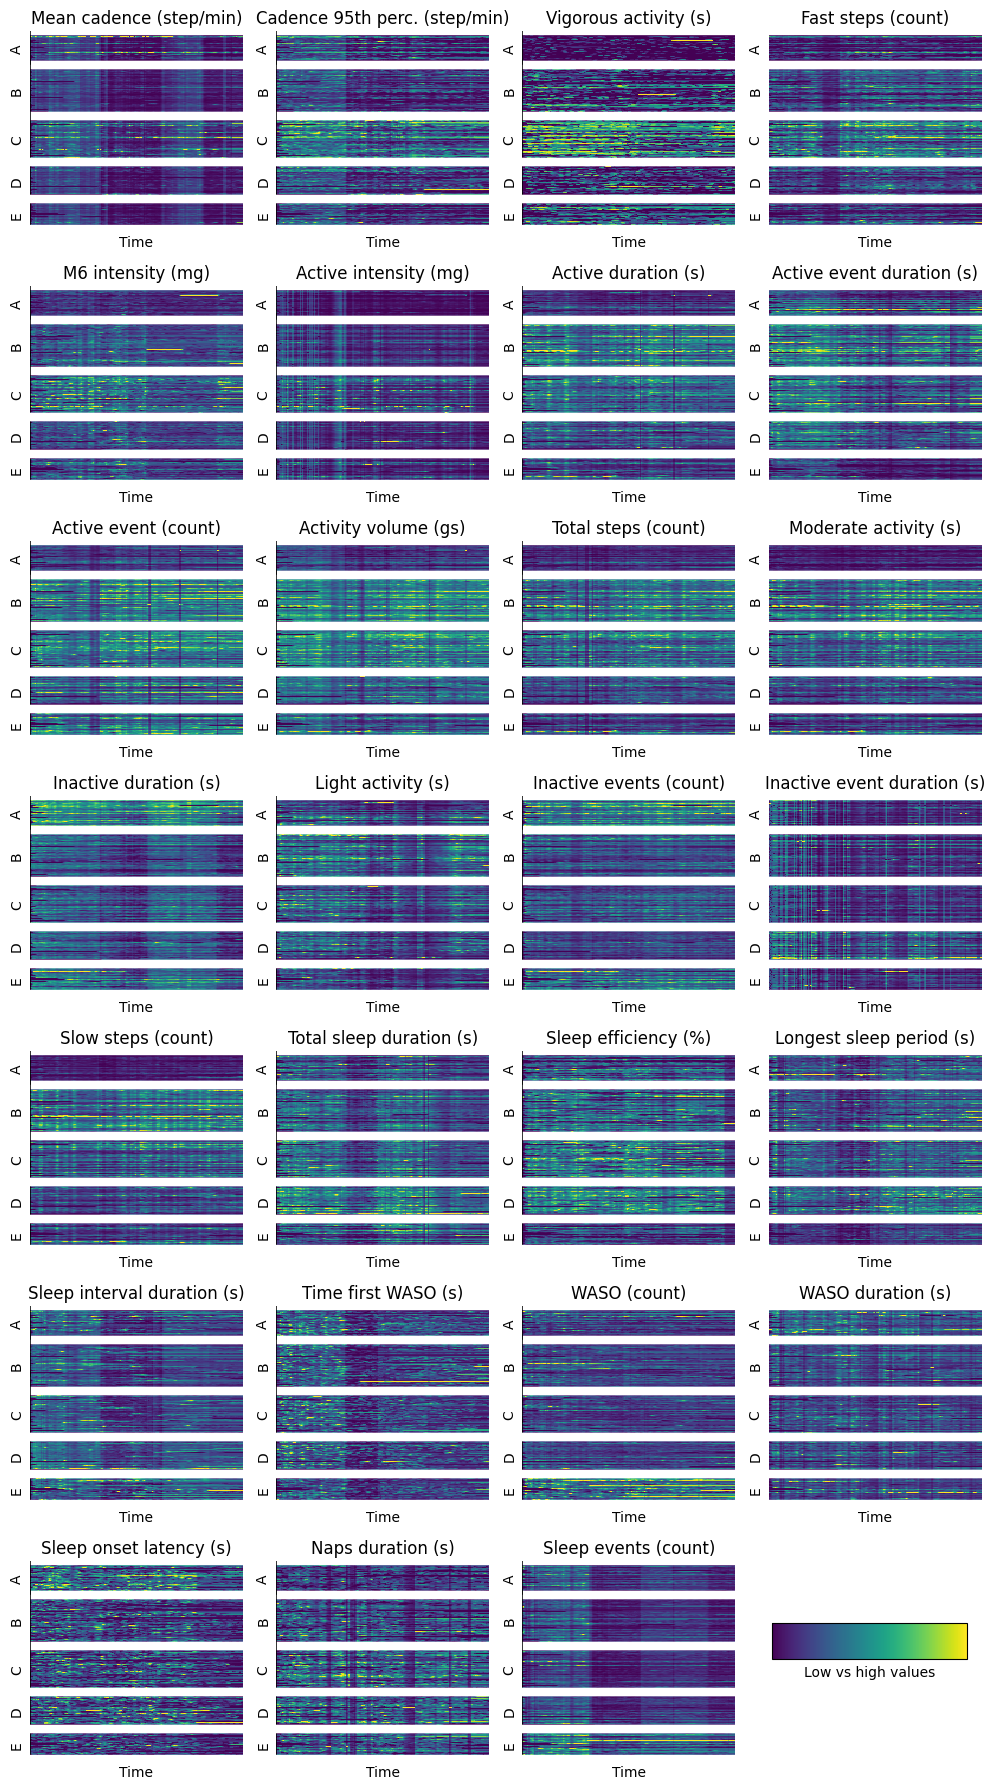

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


act = ['Inactive duration (s)', 'Active duration (s)', 'Light activity (s)', 'Moderate activity (s)',
       'Vigorous activity (s)', 'Inactive events (count)', 'Active event (count)', 'Inactive event duration (s)',
       'Active event duration (s)', 'M6 intensity (mg)', 'Active intensity (mg)', 'Activity volume (gs)',
       'Sleep onset latency (s)', 'Sleep interval duration (s)',
       'Total sleep duration (s)', 'Sleep efficiency (%)', 'WASO (count)', 'WASO duration (s)',
       'Time first WASO (s)', 'Longest sleep period (s)', 'Naps duration (s)', 'Sleep events (count)',
       'Total steps (count)', 'Mean cadence (step/min)', 'Cadence 95th perc. (step/min)', 'Slow steps (count)', 'Fast steps (count)']


activity_columns = ['Mean cadence (step/min)', 'Cadence 95th perc. (step/min)', 'Vigorous activity (s)', 'Fast steps (count)',
                   'M6 intensity (mg)', 'Active intensity (mg)', 'Active duration (s)','Active event duration (s)', 'Active event (count)',
                   'Activity volume (gs)',  'Total steps (count)', 'Moderate activity (s)', 'Inactive duration (s)',
                   'Light activity (s)', 'Inactive events (count)', 'Inactive event duration (s)', 'Slow steps (count)']


sleep_columns = ['Total sleep duration (s)', 'Sleep efficiency (%)', 'Longest sleep period (s)',
                 'Sleep interval duration (s)', 'Time first WASO (s)', 'WASO (count)', 'WASO duration (s)',
                 'Sleep onset latency (s)', 'Naps duration (s)', 'Sleep events (count)']

act_idx = activity_columns + sleep_columns

cluster_mapping = {0: 1, 1: 3, 2: 2, 3: 4, 4: 0}  # Your mapping
cluster_array = np.array([cluster_mapping[value] for value in cluster_array])

scaler = MinMaxScaler(feature_range=(0, 1))
num_rows = 7
num_cols = len(act_idx) // num_rows + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 18))

row_position = 0
col_position = 0

for metric_idx, metric in enumerate(act_idx):
    metric_data_scaled = rolled_data[:, :, act.index(metric)]
    Q1 = np.percentile(metric_data_scaled, 5, axis=(0, 1))
    Q3 = np.percentile(metric_data_scaled, 95, axis=(0, 1))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = np.mean(metric_data_scaled)
    metric_data_scaled[metric_data_scaled < lower_bound] = mean_value
    metric_data_scaled[metric_data_scaled > upper_bound] = mean_value
    metric_data_scaled = scaler.fit_transform(metric_data_scaled)
    metric_data_scaled = np.power(metric_data_scaled, 2)
    cluster_order = np.argsort(cluster_array)
    metric_data_clustered = metric_data_scaled[cluster_order, :]

    heatmap = sns.heatmap(
        metric_data_clustered,
        cmap='viridis',
        cbar = False,
        xticklabels=False,
        yticklabels=False,
        ax=axes[row_position, col_position]
    )
    unique_clusters = np.unique(cluster_array)
    for i, cluster in enumerate(unique_clusters):
        cluster_indices = np.where(cluster_array[cluster_order] == cluster)[0]
        cluster_start = cluster_indices.min()
        cluster_end = cluster_indices.max() + 1
        cluster_label = f'{chr(65 + i)}'
        axes[row_position, col_position].text(
            -5,
            (cluster_start + cluster_end) / 2,
            cluster_label,
            ha='right',
            va='center',
            fontsize=10,
            rotation='vertical'
        )
        axes[row_position, col_position].axhline(
            y=cluster_start, color='white', linewidth=6
        )
        axes[row_position, col_position].axhline(
            y=cluster_end, color='white', linewidth=6
        )
        axes[row_position, col_position].axvline(
            x=-2,
            ymin=cluster_start / len(cluster_array),
            ymax=cluster_end / len(cluster_array),
            color='black',
            linewidth=4
        )
    axes[row_position, col_position].set_title(act_idx[metric_idx])
    axes[row_position, col_position].set_xlabel('Time')
    col_position += 1
    
    if col_position == num_cols:
        col_position = 0
        row_position += 1
for i in range(row_position, num_rows):
    for j in range(col_position, num_cols):
        fig.delaxes(axes[i, j])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)

cbar_ax = fig.add_axes([0.775, 0.075, 0.195, 0.02])
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Low vs high values') 
cbar.ax.set_xticks([])
cbar.ax.set_xticklabels([])
plt.tight_layout()
plt.show()